<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/GeneralisedPredictionHDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!pip install firebase-admin
!pip install joblib
from sklearn.externals import joblib
import firebase_admin
from firebase_admin import credentials, db , storage
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import math 
import pandas as pd
from google.colab.patches import cv2_imshow


In [0]:
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='storage')

In [0]:
s1=joblib.load('S1.pkl')
s2=joblib.load('S2.pkl')
s3=joblib.load('S3.pkl')
s4=joblib.load('S4.pkl')
s5=joblib.load('S5.pkl')
s6=joblib.load('S6.pkl')
s7=joblib.load('S7.pkl')
s8=joblib.load('S8.pkl')
s9=joblib.load('S9.pkl')
s10=joblib.load('S10.pkl')
s11=joblib.load('S11.pkl')

reg = joblib.load('/content/AQImodelFINAL_withoutransmission.pkl')
lineareg = joblib.load('/content/AQImodelLinearFINAL_withoutransmission.pkl')

In [0]:
# cred = credentials.Certificate("credentials.json")

# # Initialize the app with a service account, granting admin privileges
# app = firebase_admin.initialize_app(cred, {
#     'storageBucket': 'celestini-bd493.appspot.com',
# }, name='storage')

In [109]:
##EXPERIA 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imgEXPERIA = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:26]=="predict/bhrigu/hdr/":
    blob.download_to_filename('/content/' + "EXPERIA" + str(blob.name.split('/')[-1])+ '.jpeg')
    imgEXPERIA.append("EXPERIA" + str(blob.name.split('/')[-1])+ '.jpeg') 
    print("EXPERIA" + str(blob.name.split('/')[-1])+ '.jpeg')
  if blob.name[7:26]=="predict/xperia/hdr/":
    blob.download_to_filename('/content/' + "EXPERIA" + str(blob.name.split('/')[-1])+ '.jpeg')
    imgEXPERIA.append("EXPERIA" + str(blob.name.split('/')[-1])+ '.jpeg') 
    print("EXPERIA" + str(blob.name.split('/')[-1])+ '.jpeg')
      

EXPERIA2019-07-22 15:29:19.jpeg
EXPERIA2019-07-22 15:34:19.jpeg
EXPERIA2019-07-22 15:39:19.jpeg
EXPERIA2019-07-22 15:44:19.jpeg
EXPERIA2019-07-22 15:49:19.jpeg
EXPERIA2019-07-22 15:54:19.jpeg
EXPERIA2019-07-22 16:00:21.jpeg
EXPERIA2019-07-22 16:04:19.jpeg
EXPERIA2019-07-22 16:09:19.jpeg
EXPERIA2019-07-22 16:14:19.jpeg
EXPERIA2019-07-22 16:20:21.jpeg
EXPERIA2019-07-22 16:24:19.jpeg
EXPERIA2019-07-22 16:29:19.jpeg
EXPERIA2019-07-22 16:34:19.jpeg
EXPERIA2019-07-22 16:39:19.jpeg
EXPERIA2019-07-22 16:44:19.jpeg
EXPERIA2019-07-22 16:49:19.jpeg
EXPERIA2019-07-22 16:54:19.jpeg
EXPERIA2019-07-22 16:59:19.jpeg
EXPERIA2019-07-22 17:04:19.jpeg
EXPERIA2019-07-22 17:09:19.jpeg
EXPERIA2019-07-22 17:14:19.jpeg
EXPERIA2019-07-22 17:19:19.jpeg
EXPERIA2019-07-22 17:24:19.jpeg
EXPERIA2019-07-22 17:29:19.jpeg
EXPERIA2019-07-22 17:34:19.jpeg
EXPERIA2019-07-23 11:00:58.jpeg
EXPERIA2019-07-23 11:47:15.jpeg
EXPERIA2019-07-23 11:53:04.jpeg
EXPERIA2019-07-23 12:02:15.jpeg
EXPERIA2019-07-23 12:07:16.jpeg
EXPERIA2

In [110]:
print(len(imgEXPERIA))


33


In [0]:
XHDR =[]

x_trans=[]
x_cont=[]
x_ent=[]

for img in imgEXPERIA:
    im = cv2.imread('/content/' + str(img))
    #imc = cv2.resize(im,(64,64))
    im = cv2.resize(im, (256,256))
    XHDR.append(cv2.rotate(im, rotateCode = cv2.ROTATE_90_CLOCKWISE))
    #x_trans.append(np.ndarray.flatten(transmission(imc, retMean = False)))
    x_cont.append(contrast(im))
    x_ent.append(entropy(im))

In [0]:
cred = credentials.Certificate('credentials.json')

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://fir-4ca2c.firebaseio.com/'
})

In [0]:

ref = db.reference()
df = ref.get()

In [114]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)
 

08-07-2019 02:52:50
08-07-2019 02:57:50
13-07-2019 12:43:49


In [115]:
print(len(temp_weather))

9607


In [0]:
features=[]
i=0
for k in imgEXPERIA:
  for key in temp_weather:
    temp = k[12:-5]
    temp = temp.split('-')
    newk = temp[1].split(' ')
    final = newk[0] + '-' + temp[0] + '-' + '2019' + ' ' + newk[1]
    if(final[:-4] == key[:-4]):
      l = []
      l.append(key[11:13])
      #l.append(x_trans[i])
      l.append(x_ent[i])
      l.append(x_cont[i])
      l.append(temp_weather[key])
      features.append(l)
      print('match',i)
      break
  i+=1


In [124]:
print(len(features))

33


In [0]:
hours=[]
hum=[]
pressure=[]
temp=[]
vis=[]
deg=[]
speed=[]
cc=[]
desc=[]
trans=[]
cont=[]
ent=[]
pm=[]


for e in features:
  hours.append(float(e[0]))
  ent.append(float(e[1]))
  cont.append(float(e[2]))
  hum.append(e[3][0])
  pressure.append(e[3][1])
  temp.append(e[3][2]) 
  vis.append(e[3][3])
  deg.append(e[3][4])
  speed.append(e[3][5])
  cc.append(e[3][6])
  try:
    desc.append(e[3][7])
  except:
    #print(e[0])
    desc.append(0)
  
 


# for e in features:
 
#   hours.append(float(e[0]))
#   trans.append(e[1])
#   ent.append(float(e[2]))
#   cont.append(float(e[3]))
#   hum.append(e[4][0])
#   pressure.append(e[4][1])
#   temp.append(e[4][2]) 
#   vis.append(e[4][3])
#   deg.append(e[4][4])
#   speed.append(e[4][5])
#   cc.append(e[4][6])
#   try:
#     desc.append(e[4][7])
#   except:
#     #print(e[0])
#     desc.append(0)
#   break
  
 

In [129]:
print(len(hours))
print(hours)

print(len(cont))
print(ent)
print(len(cc))
print(cc)
print(len(desc))
print(desc)



33
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0]
33
[37.5480842590332, 11.699877738952637, 40.37165832519531, 44.00581741333008, 11.644479751586914, 42.59221267700195, 31.840267181396484, 11.760087966918945, 31.282329559326172, 32.579105377197266, 37.0417594909668, 33.765846252441406, 35.57334518432617, 11.695828437805176, 11.708005905151367, 11.672887802124023, 33.93860626220703, 11.681695938110352, 11.666326522827148, 34.672122955322266, 11.650328636169434, 11.569845199584961, 11.521315574645996, 11.5598783493042, 11.553709983825684, 11.558626174926758, 10.450401306152344, 41.15580749511719, 11.453180313110352, 35.00552749633789, 11.55435562133789, 11.406633377075195, 32.174251556396484]
33
[75, 75, 75, 75, 75, 75, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 75, 75, 75, 20, 20, 20, 40, 40, 40, 40]
33
[0, 0, 0,

In [0]:
final_shape=len(hours)

#FEATURES 

hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
temp = np.reshape(temp,(final_shape,1))
vis = np.reshape(vis,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
cc = np.reshape(cc,(final_shape,1))
desc = np.reshape(desc,(final_shape,1))


hours = s1.fit_transform(hours)
cont = s2.fit_transform(cont)
ent = s3.fit_transform(ent)
hum = s4.fit_transform(hum)
pressure = s5.fit_transform(pressure)
temp = s6.fit_transform(temp)
vis = s7.fit_transform(vis)
deg = s8.fit_transform(deg)
speed = s9.fit_transform(speed)
cc = s10.fit_transform(cc)
des = s11.fit_transform(desc)


test = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc,pressure))



In [131]:
print(test)

[[0.66666667 0.86934483 0.8075502  0.06382979 0.83809524 0.88235294
  0.34782609 0.         0.78571429 0.         0.        ]
 [0.66666667 0.35241077 0.03723621 0.06382979 0.84952381 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 0.67686513 0.8916968  0.06382979 0.84952381 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 0.62720527 1.         0.06382979 0.85904762 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 0.0329538  0.03558527 0.06382979 0.85904762 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 0.74544962 0.95787253 0.06382979 0.88190476 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.83333333 0.94875911 0.63744898 0.21276596 0.73333333 0.58823529
  0.         1.         1.         0.         0.        ]
 [0.83333333 0.30135582 0.03903056 0.21276596 0.73333333 0.58823529
  0.         1.         1.         0.         0.  

In [136]:
lrX = []
lrX.append(np.ndarray.flatten(lineareg.predict(test)))
print(lrX)


[array([63.87054085, 52.28978048, 54.10950333, 52.03795029, 44.29798099,
       55.20279079, 40.81073301, 29.05971927, 42.21038688, 40.13027074,
       38.25816153, 38.59843796, 37.53286914, 31.26814456, 34.52518117,
       34.60505782, 42.16657646, 24.18935443, 26.07444346, 28.77677355,
       22.70658689, 26.04245705, 27.43395277, 30.63685326, 30.38544222,
       29.7781451 , 63.22448772, 63.6459223 , 57.01901378, 69.36497594,
       54.3503145 , 53.78023922, 74.88382375])]


In [134]:
rfX =[]
rfX.append(reg.predict(test))
print(rfX)


[array([50.49672842, 50.49672842, 50.49672842, 50.49672842, 50.49672842,
       50.49672842, 54.15676487, 54.15676487, 54.15676487, 54.15676487,
       54.15676487, 54.15676487, 54.15676487, 43.7084214 , 43.7084214 ,
       43.7084214 , 43.7084214 , 46.75885683, 46.75885683, 46.75885683,
       46.75885683, 46.75885683, 46.75885683, 54.84384951, 54.84384951,
       54.84384951, 89.23231197, 89.23231197, 89.23231197, 59.28209379,
       57.98494178, 57.98494178, 64.04224262])]


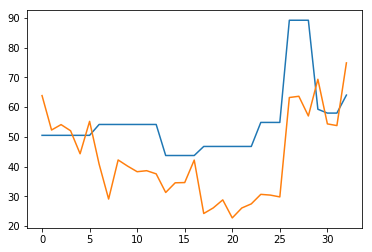

In [140]:
a = np.arange(100)
plt.plot(rfX[0])
plt.plot(lrX[0])

In [141]:
bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imgS7HDR = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:21]=="predict/s7/hdr":
    blob.download_to_filename('/content/' + "S7HDR" + str(blob.name.split('/')[-1])+ '.jpeg')
    imgS7HDR.append("S7HDR" + str(blob.name.split('/')[-1])+ '.jpeg') 
    print("S7HDR" + str(blob.name.split('/')[-1])+ '.jpeg')
      
  
     

S7HDR2019-07-22 12:34:46.jpeg
S7HDR2019-07-22 12:49:47.jpeg
S7HDR2019-07-22 12:54:47.jpeg
S7HDR2019-07-22 12:59:46.jpeg
S7HDR2019-07-22 13:04:46.jpeg
S7HDR2019-07-22 13:19:47.jpeg
S7HDR2019-07-22 13:29:46.jpeg
S7HDR2019-07-22 13:39:46.jpeg
S7HDR2019-07-22 13:49:46.jpeg
S7HDR2019-07-22 13:54:47.jpeg
S7HDR2019-07-22 13:59:46.jpeg
S7HDR2019-07-22 14:14:46.jpeg
S7HDR2019-07-22 14:24:46.jpeg
S7HDR2019-07-22 14:34:47.jpeg
S7HDR2019-07-22 14:44:46.jpeg
S7HDR2019-07-22 14:49:47.jpeg
S7HDR2019-07-22 14:54:46.jpeg
S7HDR2019-07-22 15:04:47.jpeg
S7HDR2019-07-22 15:14:46.jpeg
S7HDR2019-07-22 15:24:46.jpeg
S7HDR2019-07-22 15:34:22.jpeg
S7HDR2019-07-22 15:36:06.jpeg
S7HDR2019-07-22 15:49:50.jpeg
S7HDR2019-07-22 15:54:50.jpeg
S7HDR2019-07-22 15:59:50.jpeg
S7HDR2019-07-22 16:04:51.jpeg
S7HDR2019-07-22 16:09:51.jpeg
S7HDR2019-07-22 16:14:50.jpeg
S7HDR2019-07-22 16:19:50.jpeg
S7HDR2019-07-22 16:29:50.jpeg
S7HDR2019-07-22 16:39:50.jpeg
S7HDR2019-07-22 16:49:51.jpeg
S7HDR2019-07-22 16:54:50.jpeg
S7HDR2019-

In [0]:
s7_trans=[]
s7_cont=[]
s7_ent=[]

S7HDR =[]

for img in imgS7HDR:
    im = cv2.imread('/content/' + str(img))
    im = cv2.resize(im, (256,256))
    #imc = cv2.resize(im,(64,64))
    S7HDR.append(cv2.rotate(im, rotateCode = cv2.ROTATE_90_CLOCKWISE))
    #s7_trans.append(np.ndarray.flatten(transmission(imc, retMean = False)))
    s7_cont.append(contrast(im))
    s7_ent.append(entropy(im))


In [144]:
print(s7_ent[0])

19.491851806640625


In [145]:
print(temp_weather)

{'01-07-2019 05:31:16': [52, 999, 35.13, 3500, 250, 2.1, 40, 0], '01-07-2019 05:36:16': [52, 999, 35.55, 3500, 260, 2.6, 40, 0], '01-07-2019 05:41:16': [52, 999, 35.55, 3500, 260, 2.6, 40, 0], '01-07-2019 05:46:16': [52, 999, 35.55, 3500, 260, 2.6, 40, 0], '01-07-2019 05:51:16': [52, 999, 34.16, 3500, 260, 2.6, 40, 0], '01-07-2019 05:56:16': [52, 999, 34.16, 3500, 260, 2.6, 40, 0], '01-07-2019 06:01:16': [52, 999, 34.16, 3500, 260, 2.6, 40, 0], '01-07-2019 06:06:16': [52, 999, 34.59, 3500, 270, 1.5, 20, 0], '01-07-2019 06:11:16': [52, 999, 34.6, 3500, 270, 1.5, 20, 0], '01-07-2019 06:16:16': [52, 999, 34.59, 3500, 270, 1.5, 20, 0], '01-07-2019 06:21:16': [52, 999, 34.61, 3500, 270, 1.5, 20, 0], '01-07-2019 06:26:16': [52, 999, 34.61, 3500, 270, 1.5, 20, 0], '01-07-2019 06:31:16': [55, 1000, 34.27, 3500, 250, 1.5, 48, 0], '01-07-2019 06:36:16': [55, 1000, 34.27, 3500, 250, 1.5, 48, 0], '01-07-2019 06:41:16': [55, 1000, 34.27, 3500, 250, 1.5, 48, 0], '01-07-2019 06:46:16': [55, 1000, 34.

In [0]:
features=[]
i=0
for k in imgS7HDR:
  for key in temp_weather:
    temp = k[5:-5]
    #print(temp)
    temp = temp.split('-')
    #print(temp)
    newk = temp[2].split(' ')
    #print(newk)
    final = newk[0] + '-' + temp[1] + '-' + '2019' + ' ' + newk[1]
#     print(final[:-4])
#     print(key[:-4])
    if(final[:-4] == key[:-4]):
      l = []
      l.append(key[11:13])
      #l.append(x_trans[i])
      l.append(s7_ent[i])
      l.append(s7_cont[i])
      l.append(temp_weather[key])
      features.append(l)
      print('match',i)
      break
  i+=1

In [161]:
print(features)

[['12', 19.491851806640625, 49.43493749466067, [63, 1002, 34.13, 3000, 340, 2.6, 40, 0]], ['12', 30.84126091003418, 80.60823551472302, [63, 1002, 34.13, 3000, 340, 2.6, 40, 0]], ['12', 31.00380516052246, 81.5920046045189, [63, 1001, 34.03, 3000, 120, 1, 75, 0]], ['12', 32.374332427978516, 75.2573836139679, [63, 1001, 34.03, 3000, 120, 1, 75, 0]], ['13', 36.77726745605469, 79.51010873521204, [63, 1001, 34.02, 3000, 120, 1, 75, 0]], ['13', 38.75225830078125, 80.33157860738882, [63, 1001, 34.02, 3000, 120, 1, 75, 0]], ['13', 35.07710647583008, 77.37653089211965, [63, 1001, 34.18, 3000, 120, 1, 75, 0]], ['13', 40.34403610229492, 83.47548569844153, [63, 1001, 34.18, 3000, 120, 1, 75, 0]], ['13', 29.66027069091797, 81.38989420291114, [63, 1001, 34.13, 3000, 120, 1.5, 75, 0]], ['13', 32.8193473815918, 89.22782965168145, [63, 1001, 34.12, 3000, 120, 1.5, 75, 0]], ['13', 35.04356384277344, 87.66809450426236, [63, 1001, 34.12, 3000, 120, 1.5, 75, 0]], ['14', 31.898147583007812, 75.99020598833432

In [0]:
hours=[]
hum=[]
pressure=[]
temp=[]
vis=[]
deg=[]
speed=[]
cc=[]
desc=[]
trans=[]
cont=[]
ent=[]
pm=[]


for e in features:
  hours.append(float(e[0]))
  ent.append(float(e[1]))
  cont.append(float(e[2]))
  hum.append(e[3][0])
  pressure.append(e[3][1])
  temp.append(e[3][2]) 
  vis.append(e[3][3])
  deg.append(e[3][4])
  speed.append(e[3][5])
  cc.append(e[3][6])
  try:
    desc.append(e[3][7])
  except:
    #print(e[0])
    desc.append(0)
  

In [164]:
print(len(hours))
print(hours)

print(len(cont))

print(speed)
print(len(cc))
print(cc)
print(len(desc))
print(desc)



51
[12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0]
51
[2.6, 2.6, 1, 1, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 2.1, 2.1, 2.1, 2.1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 5.1, 5.1, 5.1, 5.1, 5.1, 4.1, 4.1, 2.6, 2.6, 2.6, 2.6, 2.6, 1, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
51
[40, 40, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 40, 40, 40, 40, 75, 75, 75, 75, 75, 75, 75, 75, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 75, 75, 75, 40, 40, 20, 20, 20, 20, 20, 40, 40, 40, 40]
51
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
final_shape=len(hours)

#FEATURES 

hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
temp = np.reshape(temp,(final_shape,1))
vis = np.reshape(vis,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
cc = np.reshape(cc,(final_shape,1))
desc = np.reshape(desc,(final_shape,1))

from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()


# hours = scaler.fit_transform(hours)
# cont = scaler.fit_transform(cont)
# ent = scaler.fit_transform(ent)
# hum = scaler.fit_transform(hum)
# pressure = scaler.fit_transform(pressure)
# temp = scaler.fit_transform(temp)
# vis = scaler.fit_transform(vis)
# deg = scaler.fit_transform(deg)
# speed = scaler.fit_transform(speed)
# cc = scaler.fit_transform(cc)
# des = scaler.fit_transform(desc)

hours = s1.fit_transform(hours)
cont = s2.fit_transform(cont)
ent = s3.fit_transform(ent)
hum = s4.fit_transform(hum)
pressure = s5.fit_transform(pressure)
temp = s6.fit_transform(temp)
vis = s7.fit_transform(vis)
deg = s8.fit_transform(deg)
speed = s9.fit_transform(speed)
cc = s10.fit_transform(cc)
des = s11.fit_transform(desc)


test = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc,pressure))



In [113]:
print(s1.data_range_)
print(s3.data_range_)

[12.]
[50.5184865]


In [166]:
print(test)
# print(s1.data_range_)
# print(s1.feature_range)

[[0.28571429 0.48190838 0.18918238 0.21276596 0.75238095 0.88235294
  1.         0.3902439  0.28571429 0.         1.        ]
 [0.28571429 0.84701446 0.47737081 0.21276596 0.75238095 0.88235294
  1.         0.3902439  0.28571429 0.         1.        ]
 [0.28571429 0.85853651 0.4814982  0.21276596 0.73333333 0.88235294
  0.33333333 0.         0.78571429 0.         0.5       ]
 [0.28571429 0.78434453 0.51629914 0.21276596 0.73333333 0.88235294
  0.33333333 0.         0.78571429 0.         0.5       ]
 [0.42857143 0.83415305 0.62810011 0.21276596 0.73142857 0.88235294
  0.33333333 0.         0.78571429 0.         0.5       ]
 [0.42857143 0.84377422 0.67824981 0.21276596 0.73142857 0.88235294
  0.33333333 0.         0.78571429 0.         0.5       ]
 [0.42857143 0.80916428 0.58492898 0.21276596 0.76190476 0.88235294
  0.33333333 0.         0.78571429 0.         0.5       ]
 [0.42857143 0.88059611 0.71866883 0.21276596 0.76190476 0.88235294
  0.33333333 0.         0.78571429 0.         0.5 

In [167]:
lrS7 = []
lrS7.append(np.ndarray.flatten(lineareg.predict(test)))
print(lrS7)

[array([43.44160324, 50.43035997, 68.7033491 , 66.59807178, 62.49913935,
       62.3710242 , 62.06940096, 62.86906865, 61.3020951 , 63.01008039,
       62.1401421 , 64.13169803, 64.37468183, 71.32074952, 69.47767453,
       69.08404458, 69.78929727, 63.31429166, 63.36944106, 65.21883497,
       43.72298893, 51.46797537, 53.96160128, 57.30187656, 60.19937302,
       37.3363168 , 36.86868295, 36.900879  , 37.0479131 , 36.00987988,
       40.15994328, 40.27714163, 31.12606477, 27.07308311, 26.96538162,
       28.99519461, 28.86785873, 34.2167142 , 33.55341761, 34.0551191 ,
       77.45231048, 77.79426277, 68.60971376, 71.16916169, 70.80136333,
       71.5053114 , 72.92604859, 73.76410044, 71.03256653, 64.3606163 ,
       58.65950133])]


In [0]:
rfS7 = []
rfS7.append(reg.predict(test))


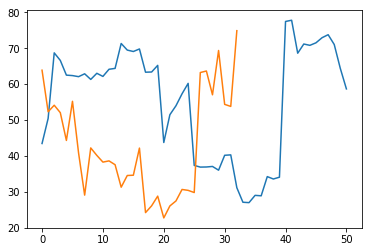

In [170]:
plt.plot(lrS7[0])
plt.plot(lrX[0])

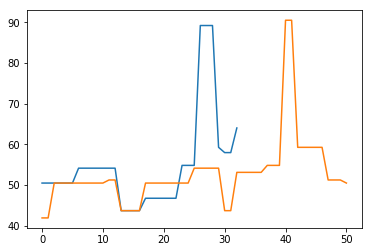

In [171]:
plt.plot(rfX[0])
plt.plot(rfS7[0])

In [252]:
for temp in temp_weather:
  temp = t.split('-')
  newk = temp[2].split(' ')
  final = newk[0] + '-' + temp[1] +  '-' + temp[0] + ' ' + newk[1][:4]
  break
  
print(final)

2019-07-23 12:3


In [257]:
ctr=0
S7=[]
XP=[]

for k in imgS7HDR:
  for l in imgEXPERIA:
    for key in cpcb:
        tempc = key.split('-')
        newkc = tempc[2].split(' ')
        finalc = newkc[0] + '-' + tempc[1] +  '-' + tempc[0] + ' ' + newkc[1][:4]
        if(k[5:-9]==l[7:-9]==finalc):
          ctr+=1
          ##reading S7 images 
          im = cv2.imread('/content/' + str(k))
          im = cv2.resize(im, (256,256))
          s7f=[]
          s7f.append(k[16:-11])
          s7f.append(contrast(im))
          s7f.append(entropy(im))
          s7f.append(cpcb[key])

          ##reading XPERIA images 
          im = cv2.imread('/content/' + str(l))
          im = cv2.resize(im, (256,256))
          xpf=[]
          xpf.append(k[16:-11])
          xpf.append(contrast(im))
          xpf.append(entropy(im))
          xpf.append(cpcb[key])
          for t in temp_weather:
            temp = t.split('-')
            newk = temp[2].split(' ')
            final = newk[0] + '-' + temp[1] +  '-' + temp[0] + ' ' + newk[1][:4]
            if(final==k[5:-9]==l[7:-9]):
              print('Matched')
              s7f.append(temp_weather[t][0])
              s7f.append(temp_weather[t][1])
              s7f.append(temp_weather[t][2])
              s7f.append(temp_weather[t][3])
              s7f.append(temp_weather[t][4])
              s7f.append(temp_weather[t][5])
              s7f.append(temp_weather[t][6])
              try:
                s7f.append(temp_weather[t][7])
              except:
                s7f.append(0)


              xpf.append(temp_weather[t][0])
              xpf.append(temp_weather[t][1])
              xpf.append(temp_weather[t][2])
              xpf.append(temp_weather[t][3])
              xpf.append(temp_weather[t][4])
              xpf.append(temp_weather[t][5])
              xpf.append(temp_weather[t][6])
              try:
                xpf.append(temp_weather[t][7])
              except:
                xpf.append(temp_weather[t][0])


              S7.append(s7f)
              XP.append(xpf)

              break
          break
             

Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched
Matched


In [258]:
print(len(S7))
print(len(S7[0]))
print(S7[0])

print(len(XP))
print(len(XP[0]))
print(XP[0])

35
12
['15', 8.288886021731193, 12.041489601135254, '58', 56, 1000, 34.64, 3000, 120, 1.5, 75, 0]
35
12
['15', 70.39109838990026, 11.699877738952637, '58', 56, 1000, 34.64, 3000, 120, 1.5, 75, 0]


In [0]:
hours=[]
hum=[]

pressure=[]
temp=[]
vis=[]
deg=[]
speed=[]
cc=[]
desc=[]
trans=[]
cont=[]
ent=[]
pm=[]


for e in S7:
  hours.append(float(e[0]))
  ent.append(float(e[1]))
  cont.append(float(e[2]))
  pm.append(float(e[3]))
  hum.append(e[4])
  pressure.append(e[5])
  temp.append(e[6]) 
  vis.append(e[7])
  deg.append(e[8])
  speed.append(e[9])
  cc.append(e[10])
  try:
    desc.append(e[11])
  except:
    #print(e[0])
    desc.append(0)
  

In [260]:
print(len(hours))
print(hours)
print(pm)

print(len(cont))

print(speed)
print(len(cc))
print(cc)
print(len(desc))
print(desc)

35
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
[58.0, 58.0, 58.0, 58.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0]
35
[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 4.1, 4.1, 4.1, 4.1, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
35
[75, 75, 75, 75, 75, 75, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 75, 20, 20, 40, 40, 40, 40, 40, 40]
35
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
final_shape=len(hours)

#FEATURES 

hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
temp = np.reshape(temp,(final_shape,1))
vis = np.reshape(vis,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
cc = np.reshape(cc,(final_shape,1))
desc = np.reshape(desc,(final_shape,1))


hours = s1.fit_transform(hours)
cont = s2.fit_transform(cont)
ent = s3.fit_transform(ent)
hum = s4.fit_transform(hum)
pressure = s5.fit_transform(pressure)
temp = s6.fit_transform(temp)
vis = s7.fit_transform(vis)
deg = s8.fit_transform(deg)
speed = s9.fit_transform(speed)
cc = s10.fit_transform(cc)
des = s11.fit_transform(desc)


test = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc,pressure))



In [262]:
print(test)

[[0.66666667 0.         0.         0.06382979 0.84952381 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 0.         0.         0.06382979 0.84952381 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 1.         0.60492564 0.06382979 0.84952381 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 1.         0.60492564 0.06382979 0.84952381 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 0.85824522 0.664763   0.06382979 0.85904762 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.66666667 0.85824522 0.664763   0.06382979 0.85904762 0.88235294
  0.47826087 0.12195122 0.78571429 0.         0.        ]
 [0.83333333 0.6410556  0.84074352 0.21276596 0.73333333 0.58823529
  0.         1.         1.         0.         0.        ]
 [0.83333333 0.6410556  0.84074352 0.21276596 0.73333333 0.58823529
  0.         1.         1.         0.         0.  

In [0]:
s7predl=[]
s7predr=[]
s7predl.append(lineareg.predict(test))
s7predr.append(reg.predict(test))

In [0]:
print(s7predl)
print(s7predr)

In [0]:
hours=[]
hum=[]
pressure=[]
temp=[]
vis=[]
deg=[]
speed=[]
cc=[]
desc=[]
trans=[]
cont=[]
ent=[]
pm=[]


for e in XP:
  hours.append(float(e[0]))
  ent.append(float(e[1]))
  cont.append(float(e[2]))
  hum.append(e[3])
  pressure.append(e[4])
  temp.append(e[5]) 
  vis.append(e[6])
  deg.append(e[7])
  speed.append(e[8])
  cc.append(e[9])
  try:
    desc.append(e[10])
  except:
    #print(e[0])
    desc.append(0)
  

In [0]:
print(len(hours))
print(hours)
print(cont)
print(ent)

print(speed)
print(len(cc))
print(cc)
print(len(desc))
print(desc)

In [0]:
final_shape=len(hours)

#FEATURES 

hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
temp = np.reshape(temp,(final_shape,1))
vis = np.reshape(vis,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
cc = np.reshape(cc,(final_shape,1))
desc = np.reshape(desc,(final_shape,1))


hours = s1.fit_transform(hours)
cont = s2.fit_transform(cont)
ent = s3.fit_transform(ent)
hum = s4.fit_transform(hum)
pressure = s5.fit_transform(pressure)
temp = s6.fit_transform(temp)
vis = s7.fit_transform(vis)
deg = s8.fit_transform(deg)
speed = s9.fit_transform(speed)
cc = s10.fit_transform(cc)
des = s11.fit_transform(desc)


test = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc,pressure))


In [0]:
xpredl=[]
xpredr=[]
xpredl.append(lineareg.predict(test))
xpredr.append(reg.predict(test))

In [0]:
print(xpredl)
print(xpredr)

(1, 29, 1)


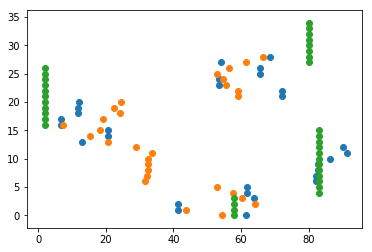

In [267]:
print(np.shape(xpredl))
p = np.arange(29)
t = np.arange(35)
plt.scatter(xpredl[0],p)
plt.scatter(s7predl[0],p)
plt.scatter(pm,t)

(1, 29, 1)


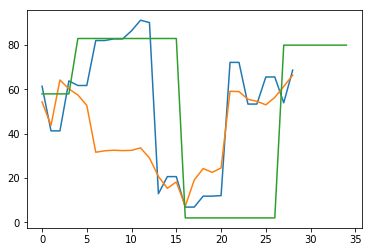

In [269]:
print(np.shape(xpredl))
p = np.arange(29)
t = np.arange(35)
plt.plot(xpredl[0])
plt.plot(s7predl[0])
plt.plot(pm)

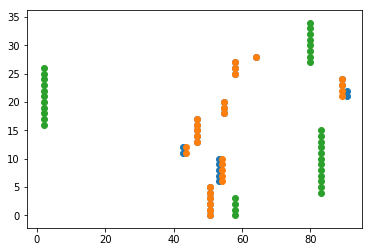

In [270]:

p = np.arange(29)
t = np.arange(35)
plt.scatter(xpredr[0],p)
plt.scatter(s7predr[0],p)
plt.scatter(pm,t)

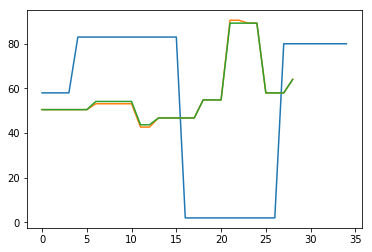

In [271]:
plt.plot(pm)
plt.plot(xpredr[0])
plt.plot(s7predr[0])

In [0]:
import csv 
k=0
cpcb={}
with open('/content/cpcb_general.csv') as file: 
  reader = csv.reader(file)
  for row in reader:
    k+=1
    if(k>=18):
      cpcb[row[0]]=row[2]
      

In [249]:
print(cpcb)

{'22-07-2019 00:00': '36', '22-07-2019 00:15': '36', '22-07-2019 00:30': '36', '22-07-2019 00:45': '36', '22-07-2019 01:00': '47', '22-07-2019 01:15': '47', '22-07-2019 01:30': '47', '22-07-2019 01:45': '47', '22-07-2019 02:00': '57', '22-07-2019 02:15': '57', '22-07-2019 02:30': '57', '22-07-2019 02:45': '57', '22-07-2019 03:00': '45', '22-07-2019 03:15': '45', '22-07-2019 03:30': '45', '22-07-2019 03:45': '45', '22-07-2019 04:00': '74', '22-07-2019 04:15': '74', '22-07-2019 04:30': '74', '22-07-2019 04:45': '74', '22-07-2019 05:00': '56', '22-07-2019 05:15': '56', '22-07-2019 05:30': '56', '22-07-2019 05:45': '56', '22-07-2019 06:00': '46', '22-07-2019 06:15': '46', '22-07-2019 06:30': '46', '22-07-2019 06:45': '46', '22-07-2019 07:00': '59', '22-07-2019 07:15': '59', '22-07-2019 07:30': '59', '22-07-2019 07:45': '59', '22-07-2019 08:00': '25', '22-07-2019 08:15': '25', '22-07-2019 08:30': '25', '22-07-2019 08:45': '25', '22-07-2019 09:00': '28', '22-07-2019 09:15': '28', '22-07-2019

RUN BEFORE RUNNING ANYTHING 

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont